In [48]:

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io, img_as_ubyte, color
from skimage.filters import threshold_multiotsu

# Read images
!wget "https://prod-images-static.radiopaedia.org/images/5102272/9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg"
!wget "https://images.squarespace-cdn.com/content/v1/5e2803765b739101d3ba4277/1596954629362-JWSVAKC0KMAS4EZVPWK5/Kidney%2BCancer%2BCoronal%2BCT.jpg"



--2022-02-06 12:42:16--  https://prod-images-static.radiopaedia.org/images/5102272/9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg
Resolving prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)... 104.26.9.61, 104.26.8.61, 172.67.72.247, ...
Connecting to prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)|104.26.9.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36015 (35K) [image/jpeg]
Saving to: ‘9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg.7’

9e19a6982f87a8d3cb8 100%[===================>]  35.17K  --.-KB/s    in 0s      

2022-02-06 12:42:16 (90.1 MB/s) - ‘9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg.7’ saved [36015/36015]

--2022-02-06 12:42:17--  https://images.squarespace-cdn.com/content/v1/5e2803765b739101d3ba4277/1596954629362-JWSVAKC0KMAS4EZVPWK5/Kidney%2BCancer%2BCoronal%2BCT.jpg
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connec

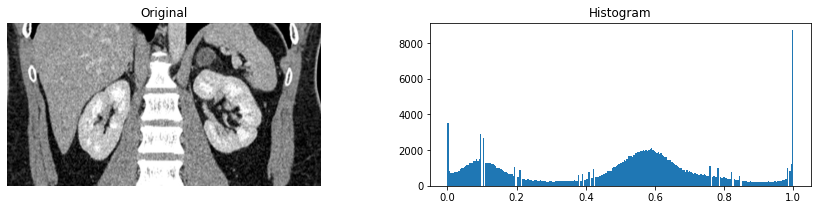

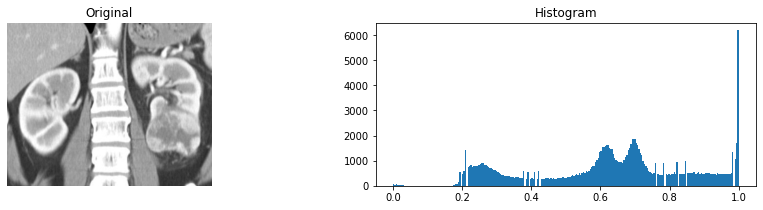

In [49]:

# read the image of a plant seedling as grayscale from the outset
image = color.rgb2gray(io.imread("9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg"))
image2 = io.imread("Kidney+Cancer+Coronal+CT.jpg", as_gray=True)

#Let us look at the input image and the histogram 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

# Plotting the first image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram 
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')

plt.subplots_adjust()
plt.show()

### same operation for image 2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))


# Plotting the second image.
ax[0].imshow(image2, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram 
ax[1].hist(image2.ravel(), bins=255)
ax[1].set_title('Histogram')

plt.subplots_adjust()
plt.show()

In [51]:
# Apply multi-Otsu threshold for the first image
thresholds = threshold_multiotsu(image, classes=3)
# Apply multi-Otsu threshold for the second image
thresholds2 = threshold_multiotsu(image2, classes=4)

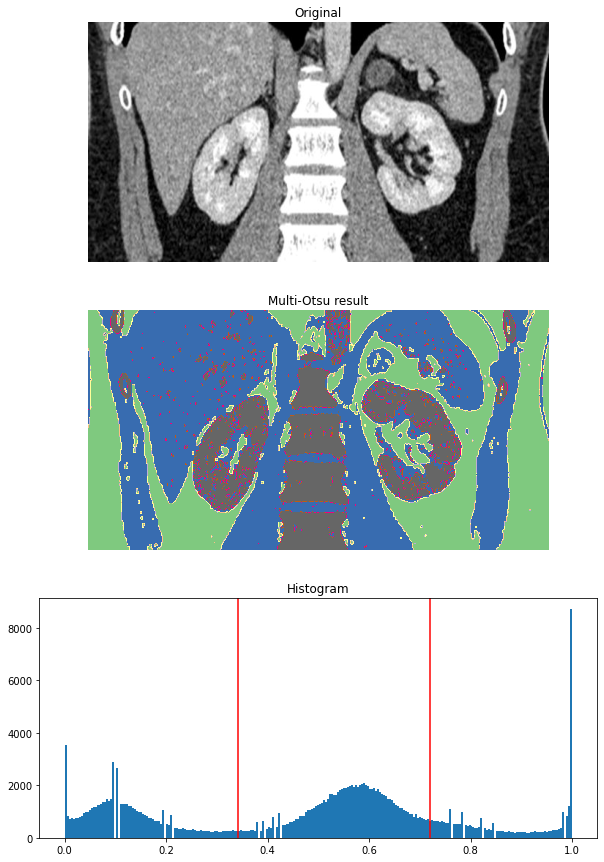

In [52]:
# segment the first image into multiple classes with Digitize.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(image, bins=thresholds)
#output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8
#plt.imsave("images/Otsu_Segmented.jpg", output)


#Let us look at the 1st input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting the 1st image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[2].hist(image.ravel(), bins=255)
ax[2].set_title('Histogram')
for thresh in thresholds:
    ax[2].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[1].imshow(regions, cmap='Accent')
ax[1].set_title('Multi-Otsu result')
ax[1].axis('off')

plt.subplots_adjust()

plt.show()



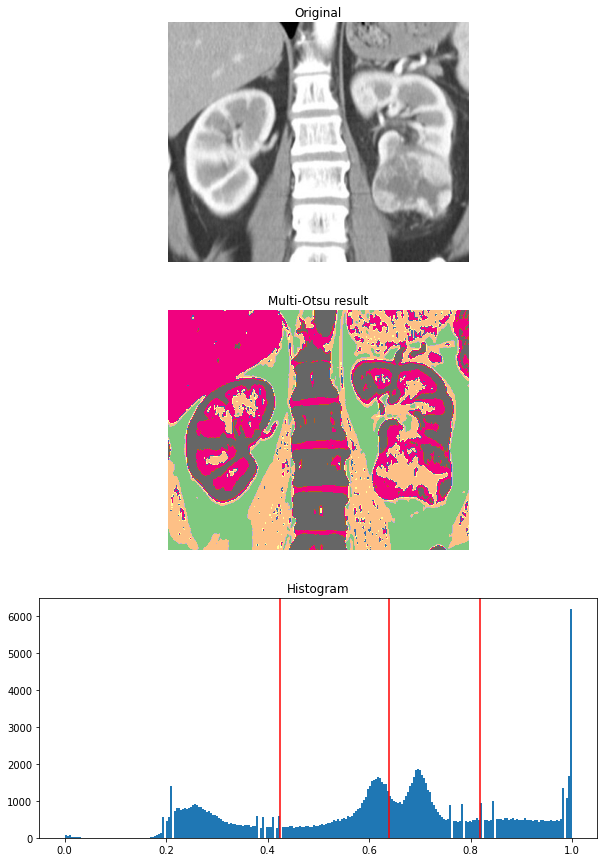

In [53]:
### second image, same operation

regions2 = np.digitize(image2, bins=thresholds2)

#Let us look at the 2nd input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting the 2dn image.
ax[0].imshow(image2, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the three thresholds obtained from
# multi-Otsu.
ax[2].hist(image2.ravel(), bins=255)
ax[2].set_title('Histogram')
for thresh in thresholds2:
    ax[2].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[1].imshow(regions2, cmap='Accent')
ax[1].set_title('Multi-Otsu result')
ax[1].axis('off')

plt.subplots_adjust()

plt.show()